## Mathematical Foundations of Computer Graphics and Vision 2023
## Exercise 2 - Global Optimization

In this exercise you will apply what you learned about global optimization, especially branch and bound (B&B), concave and convex envelopes, and reformulation. You will implement branch and bound for consensus set maximization.

<b style="color:red"> TODO A: </b>:  Derivation of the problem formulation in the canonical form of Linear Programming. Please explain all your steps clearly. You may use the hints and notation from section 2 of the excercise sheet.

Starting with equations $(5a)$, $(5b)$, $(5c)$ from *Exercise2.pdf*. $\\$
$(5a)   \max\limits_{\Theta, S_I}\quad card(S_I) \\$
$(5b)   \ s.t. \quad | x_i + T_x - x'_i | \leq \delta, \forall i \in S_I \subseteq S \\$
$(5c)   \hspace{26pt} | y_i + T_y - y'_i | \leq \delta, \forall i \in S_I \subseteq S \\~\\$

We convert to the alternative formulation shown in Lecture Slides 3, Slide 45, by multiplying both sides of the inequalities $(5b)$ and $(5c)$ with $z_i$ and rewriting cardinality as a sum of $z_i$. $\\$
$ z_i = \begin{cases} 1 &\text{if } i^{th} &\text{data point is an inlier} \\ 0 &\text {else } \end{cases} \\~\\$
$ \max\limits_{\textbf{z}, \Theta}\quad \sum\limits_{i = 1}^N(z_i)\\$
$ \ s.t. \quad z_i| x_i + T_x - x'_i | = | z_i x_i + z_i T_x - z_i x'_i | \leq z_i\delta, \forall i \in 1..N \\$
$ \hspace{26pt} z_i| y_i + T_y - y'_i | = | z_i y_i + z_i T_y - z_i y'_i |\leq z_i\delta, \forall i \in 1..N \\$
$ \hspace{26pt} z_i \in \{0,1\}, \forall i \in 1..N \\~\\$ 

To avoid bilinearity, we add the auxiliary variables $w_{ix} = z_i T_x$ and $w_{iy} = z_i T_y$. We also relax $z_i \in \{0,1\}$ to $z_i \in [0,1]. \\$
$(6a) \max\limits_{\textbf{z}, \Theta}\quad \sum\limits_{i = 1}^N(z_i)\\ $
$(6b) \ s.t. \quad | z_i x_i + w_{ix} - z_i x'_i | \leq z_i\delta, \forall i \in 1..N \\$
$(6c) \hspace{26pt} | z_i y_i + w_{iy} - z_i y'_i | \leq z_i\delta, \forall i \in 1..N \\$
$     \hspace{46pt} z_i \in [0,1], \forall i \in 1..N \\~\\$


Bilinear equality $\gamma = \alpha \beta$ with bounding-boxes $\alpha \in [\underline{\alpha}, \overline{\alpha}]$ and $\beta \in [\underline{\beta}, \overline{\beta}]$ is relaxed with the following envelopes: $\\$
$\gamma \geq \max(\underline{\alpha}\beta + \underline{\beta}\alpha - \underline{\alpha}\underline{\beta}, \overline{\alpha}\beta + \overline{\beta}\alpha - \overline{\alpha}\overline{\beta}) \\$
$\gamma \leq \min(\overline{\alpha}\beta + \underline{\beta}\alpha - \overline{\alpha}\underline{\beta}, \underline{\alpha}\beta + \overline{\beta}\alpha - \underline{\alpha}\overline{\beta}) \\$
*(taken from Lecture Slides 3, Slide 50)* $\\~\\$

We know that $z_i \in [0,1]$. We additionally define the bounds for $T_x \in [\underline{T_x}, \overline{T_x}]$ and $T_y \in [\underline{T_y}, \overline{T_y}]$. The relaxation for the bilinear equality $w_{ix} = z_i T_x$ shown. The relaxation for $w_{iy} = z_i T_y$ is analogous. $\\$
$w_{ix} \geq \max (0 \cdot T_x + \underline{T_x} \cdot z_i - 0 \cdot \underline{T_x}, 1 \cdot T_x + \overline{T_x} \cdot z_i - 1 \cdot \overline{T_x}) = \max (\underline{T_x} \cdot z_i, T_x + \overline{T_x} \cdot z_i - \overline{T_x}) \\$

$w_{ix} \leq \min (1 \cdot T_x + \underline{T_x} \cdot z_i - 1 \cdot \underline{T_x}, 0 \cdot T_x + \overline{T_x} \cdot z_i - 0 \cdot \overline{T_x}) = \min(T_x + \underline{T_x} \cdot z_i - \underline{T_x}, \overline{T_x} \cdot z_i) \\$


$w_{ix} \geq \max (\underline{T_x} \cdot z_i, T_x + \overline{T_x} \cdot z_i - \overline{T_x}) \rArr \begin{cases} w_{ix} \geq \underline{T_x} \cdot z_i \hspace{75pt} (7a) \\  w_{ix} \geq T_x + \overline{T_x} \cdot z_i - \overline{T_x} \hspace{30pt} (7b) \end{cases} \\$

$w_{ix} \leq \min(T_x + \underline{T_x} \cdot z_i - \underline{T_x}, \overline{T_x} \cdot z_i) \rArr \begin{cases} w_{ix} \leq T_x + \underline{T_x} \cdot z_i - \underline{T_x} \hspace{32pt} (7c) \\ w_{ix} \leq \overline{T_x} \cdot z_i \hspace{77pt} (7d) \end{cases} \\~\\$

The equations $(6a)$, $(6b)$, $(6c)$, $(7a)$, $(7b)$, $(7c)$, $(7d)$ and the equations for the relaxation of the bilinear equality, give us the linear inequality constraints. Additionally we should not forget about the bounds of $z_i$, $T_x$, $T_y$. $\\$


$ \max\limits_{\textbf{z}, \Theta}\quad \sum\limits_{i = 1}^N(z_i)\\[4pt]$
$ \ s.t. \quad | z_i x_i + w_{ix} - z_i x'_i | \leq z_i\delta \\[4pt]$
$ \hspace{26pt} | z_i y_i + w_{iy} - z_i y'_i | \leq z_i\delta \\[4pt]$
$ \hspace{28pt} w_{ix} \geq \underline{T_x} \cdot z_i \\[4pt]$
$ \hspace{28pt} w_{ix} \geq T_x + \overline{T_x} \cdot z_i - \overline{T_x} \\[4pt]$
$ \hspace{28pt} w_{ix} \leq T_x + \underline{T_x} \cdot z_i - \underline{T_x} \\[4pt]$
$ \hspace{28pt} w_{ix} \leq \overline{T_x} \cdot z_i \\[4pt]$
$ \hspace{28pt} w_{iy} \geq \underline{T_y} \cdot z_i \\[4pt]$
$ \hspace{28pt} w_{iy} \geq T_y + \overline{T_y} \cdot z_i - \overline{T_y} \\[4pt]$
$ \hspace{28pt} w_{iy} \leq T_y + \underline{T_y} \cdot z_i - \underline{T_y} \\[4pt]$
$ \hspace{28pt} w_{iy} \leq \overline{T_y} \cdot z_i \\[4pt]$
$ \hspace{28pt} z_i \in [0,1], \forall i \in 1..N \\[4pt]$
$ \hspace{28pt} T_x \in [\underline{T_x}, \overline{T_x}] \\[4pt]$
$ \hspace{28pt} T_y \in [\underline{T_y}, \overline{T_y}] \\~\\$

Reformulate the constraints, getting rid of the absolute terms: $|a| \leq b \rArr a \leq b$ and $-a \leq b$ $\\$
$ \max\limits_{\textbf{z}, \Theta}\quad \sum\limits_{i = 1}^N(z_i)\\[4pt]$
$ \ s.t. \quad   z_i x_i + w_{ix} - z_i x'_i  \leq z_i\delta \\[4pt]$
$ \hspace{26pt} -(z_i x_i + w_{ix} - z_i x'_i) \leq z_i\delta \\[4pt]$
$ \hspace{26pt}  z_i y_i + w_{iy} - z_i y'_i  \leq z_i\delta \\[4pt]$
$ \hspace{26pt} -(z_i y_i + w_{iy} - z_i y'_i) \leq z_i\delta \\[4pt]$
$ \hspace{28pt} w_{ix} \geq \underline{T_x} \cdot z_i \\[4pt]$
$ \hspace{28pt} w_{ix} \geq T_x + \overline{T_x} \cdot z_i - \overline{T_x} \\[4pt]$
$ \hspace{28pt} w_{ix} \leq T_x + \underline{T_x} \cdot z_i - \underline{T_x} \\[4pt]$
$ \hspace{28pt} w_{ix} \leq \overline{T_x} \cdot z_i \\[4pt]$
$ \hspace{28pt} w_{iy} \geq \underline{T_y} \cdot z_i \\[4pt]$
$ \hspace{28pt} w_{iy} \geq T_y + \overline{T_y} \cdot z_i - \overline{T_y} \\[4pt]$
$ \hspace{28pt} w_{iy} \leq T_y + \underline{T_y} \cdot z_i - \underline{T_y} \\[4pt]$
$ \hspace{28pt} w_{iy} \leq \overline{T_y} \cdot z_i \\[4pt]$
$ \hspace{28pt} z_i \in [0,1], \forall i \in 1..N \\[4pt]$
$ \hspace{28pt} T_x \in [\underline{T_x}, \overline{T_x}] \\[4pt]$
$ \hspace{28pt} T_y \in [\underline{T_y}, \overline{T_y}] \\~\\$

Finally we write down the final linear constraints in canonical form (in Python for *linprog*): $\\$
$ \max\limits_{\textbf{z}, \Theta}\quad \sum\limits_{i = 1}^N(z_i)\\[4pt]$
$ \ s.t. \quad   (x_i - x'_i - \delta) z_i + w_{ix} \leq 0 \\[4pt]$
$ \hspace{26pt}  (x'_i - x_i - \delta) z_i - w_{ix} \leq 0 \\[4pt]$
$ \hspace{26pt}  (y_i - y'_i - \delta) z_i + w_{iy} \leq 0 \\[4pt]$
$ \hspace{26pt}  (y'_i - y_i - \delta) z_i - w_{iy} \leq 0 \\[4pt]$
$ \hspace{28pt}  \underline{T_x} \cdot z_i - w_{ix} \leq 0 \\[4pt]$
$ \hspace{28pt}  T_x + \overline{T_x} \cdot z_i - w_{ix} \leq \overline{T_x} \\[4pt]$
$ \hspace{28pt}  -T_x - \underline{T_x} \cdot z_i + w_{ix} \leq \underline{T_x} \\[4pt]$
$ \hspace{28pt}  -\overline{T_x} \cdot z_i + w_{ix} \leq 0 \\[4pt]$
$ \hspace{28pt}  \underline{T_y} \cdot z_i - w_{iy} \leq 0 \\[4pt]$
$ \hspace{28pt}  T_y + \overline{T_y} \cdot z_i - w_{iy} \leq \overline{T_y} \\[4pt]$
$ \hspace{28pt}  -T_y - \underline{T_y} \cdot z_i + w_{iy} \leq \underline{T_y} \\[4pt]$
$ \hspace{28pt}  -\overline{T_y} \cdot z_i + w_{iy} \leq 0 \\[4pt]$
$ \hspace{28pt} z_i \in [0,1], \forall i \in 1..N \\[4pt]$
$ \hspace{28pt} T_x \in [\underline{T_x}, \overline{T_x}] \\[4pt]$
$ \hspace{28pt} T_y \in [\underline{T_y}, \overline{T_y}] \\~\\$










#### Branch and Bound Implementation for the Consensus Set Maximization Problem

<b style="color:red"> TODO B: </b>In the following code you are supposed to implement consensus set maximization by branch and bound in the context of stereo matching where the model is a 2D translation between two input images. Please use the imports listed in the cell down. You may also add more imports for example for visualization purposes if you find them useful.


In [1]:
%matplotlib inline
import math
import heapq
from typing import Tuple, List, Optional
from collections import namedtuple
import os

import numpy as np
from scipy.io import loadmat
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


# Translation Theta
T = namedtuple("T", ["x", "y"])

We provide you some skeleton code that you are free to use as it is or where you can also add/ delete parameters.
You may also write auxiliary functions if you feel the need to do so.

In [2]:
# Load input points, input image and fix delta parameter
corr = loadmat('data/ListInputPoints')['ListInputPoints'] # correspondences (nx4 array) [x_i,y_i,x_i',y_i']
N = corr.shape[0]  # number of total points

left_image = plt.imread('data/InputLeftImage.png')
right_image = plt.imread('data/InputRightImage.png')
image_size = left_image.shape

delta = 3  # inlier threshold [pixels]

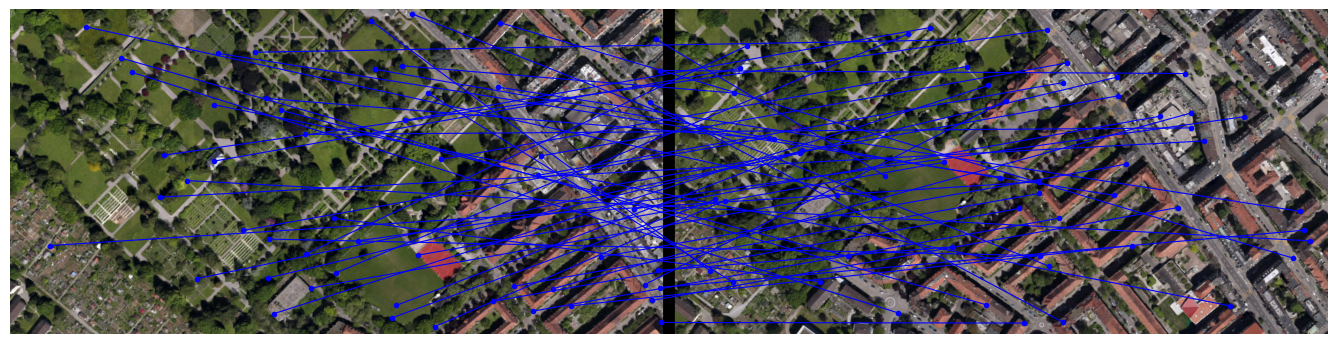

In [3]:
def plot_matches(inliers: List, outliers: List):
    fig, ax = plt.subplots(1, figsize=(17, 7))
    
    gap = np.zeros_like(left_image[:, :20])
    stitched = np.concatenate((left_image, gap, right_image), 1)
    ax.imshow(stitched)
    
    offset = left_image.shape[1] + gap.shape[1]

    for idx, line in enumerate(corr):
        x1, y1, x2, y2 = line
        if idx in inliers:
            color = "lime"
        elif idx in outliers:
            color = "crimson"
        else:
            color = "blue"
        
        ax.plot([x1, offset + x2], [y1, y2], ".-", color=color, linewidth=0.8)

    ax.axis('off')
    plt.show(fig)
    plt.close(fig)


plot_matches(inliers=[], outliers=[])

To help with implementing and debugging BnB, we provide a naive estimation of the inlier upper bound within box constraints of $[\underline{T_x}, \overline{T_x}]\times[\underline{T_y}, \overline{T_y}]$.

In [4]:
def naive_upper_bound(theta_lower: T, theta_upper: T) -> Tuple[T, int]:
    """
    Naive estimation of the upper bound on objective
    Calculates number of inliers in region [Tx_lb, Tx_ub]x[Ty_lb, Ty_ub]

    Parameters:
    - theta_lower, theta_upper: Lower and upper bounds for T

    Returns:
    - Tuple (translation, objcost) representing the estimated upper bound on the model and the objective
    """

    x1, y1, x2, y2 = corr.T
    
    T_x = x2 - x1
    T_y = y2 - y1
    
    inliers = (((T_x + delta) >= theta_lower.x) *
               ((T_y + delta) >= theta_lower.y) *
               ((T_x - delta) <= theta_upper.x) *
               ((T_y - delta) <= theta_upper.y))
    
    #Set center of region as new model
    theta = T(0.5 * (theta_lower.x + theta_upper.x), 0.5 * (theta_lower.y + theta_upper.y))

    return theta, np.sum(inliers)


In [13]:
def is_inlier(theta: T) -> np.ndarray:
    """
    Parameters:
    - theta - model that's being tested
    
    Returns:
    - bool vector f size N, where i-th element indicates if i-th point of `corr` is an inlier
    """

    #TODO: Compute if i-th element is an inliers
    inliers = np.logical_and(np.less_equal(np.abs(corr[:,0] - corr[:,2]), delta),
                             np.less_equal(np.abs(corr[:,1] - corr[:,3]), delta))
    
    return inliers


In [14]:
def solve_relaxed_LP(theta_lower: T, theta_upper: T) -> Tuple[T, int]:
    """
    Parameters:
    - theta_lower, theta_upper: Lower and upper bounds for T
    
    Returns:
    -  Tuple that contains the solution (T, objcost) of the relaxed LP
    """
    
    #TODO: Implement relaxed LP

    # c index correspondences:
    # c[-2]~Tx, c[-1]~Ty, c[0...(N-1)]~z_i, c[N...(2N-1)]~w_ix, c[2N...(3N-1)]~w_iy
    c = np.zeros(3*N + 2)
    
    # Negate objective function and result to maximize
    np.put(c, np.arange(N), -1)

    b = np.zeros(12*N)
    for i in range(N):
        b[12*i + 5] = theta_upper.x
        b[12*i + 6] = theta_lower.x
        b[12*i + 9] = theta_upper.y
        b[12*i + 10] = theta_lower.y

    A = np.zeros((12*N, 3*N + 2))
    for i in range(N):
        # First four constraints
        A[12*i, i] = (corr(i, 0) - corr(i, 2) - delta)
        A[12*i, N+i] = 1

        A[12*i+1, i] = (corr(i, 2) - corr(i, 0) - delta)
        A[12*i+1, N+i] = -1
        
        A[12*i+2, i] = (corr(i, 1) - corr(i, 3) - delta)
        A[12*i+2, 2*N+i] = 1

        A[12*i+3, i] = (corr(i, 3) - corr(i, 1) - delta)
        A[12*i+3, 2*N+i] = -1

        # w_ix
        A[12*i+4, i] = theta_lower.x
        A[12*i+4, N+i] = -1

        A[12*i+5, -2] = 1
        A[12*i+5, i] = theta_upper.x
        A[12*i+5, N+i] = -1

        A[12*i+6, -2] = -1
        A[12*i+6, i] = theta_lower.x
        A[12*i+6, N+i] = 1        
   
        A[12*i+7, i] = -theta_upper.x
        A[12*i+7, N+i] = 1

        # w_iy   
        A[12*i+8, i] = theta_lower.y
        A[12*i+8, 2*N+i] = -1

        A[12*i+9, -1] = 1
        A[12*i+9, i] = theta_upper.y
        A[12*i+9, 2*N+i] = -1

        A[12*i+10, -1] = -1
        A[12*i+10, i] = theta_lower.y
        A[12*i+10, 2*N+i] = 1        
   
        A[12*i+11, i] = -theta_upper.y
        A[12*i+11, 2*N+i] = 1      
    
    res = linprog(c=c, A_ub=A, b_ub=b)
    theta = T(-res.x[-2], -res.x[-1])
    num_inliers = np.sum(is_inlier(theta))

    return theta, num_inliers


In [ ]:
def compute_lower_bound(theta_lower: T, theta_upper: T) -> Tuple[T, int]:
    theta = T(0,0)
    num_inliers = 0

    return theta, num_inliers

In [ ]:
def consensus_set_maximization_by_bnb(image_size: Tuple[int, int], upper_bound_fn) -> Tuple[T, List[int], List[int]]:
    """
    Parameters:
    - image_size - tuple of image size (H, W)

    Returns a tuple of
    - Best model according to the BnB algorithm
    - list of upper bounds for each iteration
    - list of lower bounds for each iteration
    """
    
    h, w, _ = image_size

    best_model = T(0, 0)
    upper_bounds = []
    lower_bounds = []

    #TODO: Implement BnB

    M = namedtuple("Model", "ThetaLowerBound ThetaUpperbound ObjLowerBound ObjUpperbound ThetaOptimizer")
    theta_upper = T(w, h)
    theta_lower = T(0, 0)
    model_list = []
    model_list.append(M(theta_lower, theta_upper))

    theta_upper = T(w, h)
    theta_lower = T(0, 0)
    # Returns upper bounds
    while True:
        theta_upper, num_inliers_upper = solve_relaxed_LP(theta_lower=theta_lower, theta_upper=theta_upper)
        # User new theta upper?
        theta_lower, num_inliers_lower = compute_lower_bound(theta_lower=theta_lower, theta_upper=theta_upper)

        # Greedy search: take best candidate in list, split into two children,
        # compute their cardinality bounds and remove all elements in the list with a bad bound
        # When you take the best candidate, remove it from list, add its two children to the list.
        # When branching split into two children subspaces in half along longest dimension.
        
        # Iterate and remove spaces that definitely do not contain the optimal solution. Ex: If m*
        # is the highest lower bound of inliers, then any space with upper cardinality bound less than m*
        # can be safely removed.

        # Stop when upper and lower bound (num inliers) are 1 (Correct?)
        if(num_inliers_upper - num_inliers_lower < 1):
            break

    return best_model, lower_bounds, upper_bounds


In [ ]:
def plot_bound_convergence(lower_bounds: List[int], upper_bounds: List[int]):
    fig, ax = plt.subplots(1, figsize=(17, 7))
    
    iterations = np.arange(len(lower_bounds)) + 1
    
    # Draw lines
    ax.plot(iterations, lower_bounds, marker="o", color="r")
    ax.plot(iterations, upper_bounds, marker="o", color="b")
    
    # Write titles
    ax.set_title("Convergence of Bounds")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Upper and Lower Bounds")
    ax.legend(["Lower Bound", "Upper Bound"], loc="upper right")
    ax.xaxis.set_major_locator(MultipleLocator(1 if len(lower_bounds) < 20 else 5))
    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.grid(True)

    plt.show(fig)
    plt.close(fig)


In [ ]:
def perform_bnb(upper_bound_fn):
    
    #perform consensus set maximization
    best_model, lower_bounds, upper_bounds = consensus_set_maximization_by_bnb(image_size, upper_bound_fn)
    
    inliers = is_inlier(best_model)
    
    inliers_indices = np.where(inliers)[0]
    outliers_indices = np.where(~inliers)[0]
    
    print(f"Global optimal translational model (Tx, Ty) = {best_model}")
    print(f"Inlier set S_I: {inliers_indices} ({len(inliers_indices)} points)")
    print(f"Outlier indices S_O = S\S_I: {outliers_indices}")
    
    plot_matches(inliers_indices, outliers_indices)
    
    plot_bound_convergence(lower_bounds, upper_bounds)


#### Results

<b style="color:red"> TODO C-E: </b> Present and discuss your results. Also plot the figures described in the deliverables D and E.

In [ ]:
# Display results with the naive upper bound
perform_bnb(naive_upper_bound)

In [ ]:
# Display results with the LP upper bound
perform_bnb(solve_relaxed_LP)

<b style="color:red"> Discussion (not graded): </b> In the previous exercise, you implemented RANSAC to fit polynomials. Now, can you use RANSAC to solve the consensus set maximization problem for stereo matching? If so, please briefly describe the main steps you would take to implement RANSAC for this task, and compare it with the BnB approach. Additionally, can you identify scenarios where one approach may be more effective than the other? If not, explain why it is not feasible to adapt RANSAC for this application. Can you also combine RANSAC and BnB in one pipeline?

_TODO_: Your answer here